In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
import warnings
warnings.filterwarnings('ignore')

**Read data description and dataset**

In [2]:
desc = pd.read_csv('hcv data description.csv')
desc

,kolom,deskripsi
0,by,Nicolaus Reva S/225314097
1,about data,Dataset ini berisikan nilai-nilai laboratorium...
2,Unnamed: 0,ID Pasien
3,Category,"nilai yang mencakup 0=donor darah, 0s=donor da..."
4,Age,umur pasien
5,Sex,jenis kelamin
6,ALB,Albumin adalah protein yang paling umum ditemu...
7,ALP,enzim yang ditemukan di seluruh tubuh. Meskipu...
8,ALT,Alaine aminotransferase atau sering disebut se...
9,AST,Aspartate aminotransferase atau sering disebut...


In [3]:
data = pd.read_csv('hcvdat0.csv')
data

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum().sum()

31

In [7]:
data.isna().sum().sum()

31

In [8]:
data.shape

(615, 14)

In [9]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


**Drop target and unnamed columns**

In [10]:
data['Category'].unique()

array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis',
       '2=Fibrosis', '3=Cirrhosis'], dtype=object)

In [11]:
y = data['Category']
data.drop(['Category', 'Unnamed: 0'], axis=1, inplace=True)

In [12]:
data['Sex'].unique()

array(['m', 'f'], dtype=object)

In [13]:
data['Sex'][data['Sex'] == 'f'] = 0
data['Sex'][data['Sex'] == 'm'] = 1
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


**Handling Missing value**

In [14]:
features = data.columns
features

Index(['Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA',
       'GGT', 'PROT'],
      dtype='object')

In [15]:
miss_val = data[['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']]
miss_features = miss_val.columns
miss_val

,ALB,ALP,ALT,CHOL,PROT
0,38.5,52.5,7.7,3.23,69.0
1,38.5,70.3,18.0,4.80,76.5
2,46.9,74.7,36.2,5.20,79.3
3,43.2,52.0,30.6,4.74,75.7
4,39.2,74.1,32.6,4.32,68.7
...,...,...,...,...,...
610,32.0,416.6,5.9,6.30,68.5
611,24.0,102.8,2.9,3.02,71.3
612,29.0,87.3,3.5,3.63,82.0
613,33.0,NaN,39.0,4.20,71.0


In [16]:
imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=10, tol=0.001, n_nearest_features=None, initial_strategy='median')
miss_val = pd.DataFrame(imputer.fit_transform(miss_val), columns=miss_features)
miss_val

,ALB,ALP,ALT,CHOL,PROT
0,38.5,52.500000,7.7,3.23,69.0
1,38.5,70.300000,18.0,4.80,76.5
2,46.9,74.700000,36.2,5.20,79.3
3,43.2,52.000000,30.6,4.74,75.7
4,39.2,74.100000,32.6,4.32,68.7
...,...,...,...,...,...
610,32.0,416.600000,5.9,6.30,68.5
611,24.0,102.800000,2.9,3.02,71.3
612,29.0,87.300000,3.5,3.63,82.0
613,33.0,76.287690,39.0,4.20,71.0


In [17]:
data[['ALB', 'ALP', 'ALT', 'CHOL', 'PROT']] = miss_val
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    object 
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 57.8+ KB


In [19]:
data['Sex'] = data['Sex'].astype(np.int64)

In [20]:
data

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     615 non-null    int64  
 1   Sex     615 non-null    int64  
 2   ALB     615 non-null    float64
 3   ALP     615 non-null    float64
 4   ALT     615 non-null    float64
 5   AST     615 non-null    float64
 6   BIL     615 non-null    float64
 7   CHE     615 non-null    float64
 8   CHOL    615 non-null    float64
 9   CREA    615 non-null    float64
 10  GGT     615 non-null    float64
 11  PROT    615 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 57.8 KB


<Axes: >

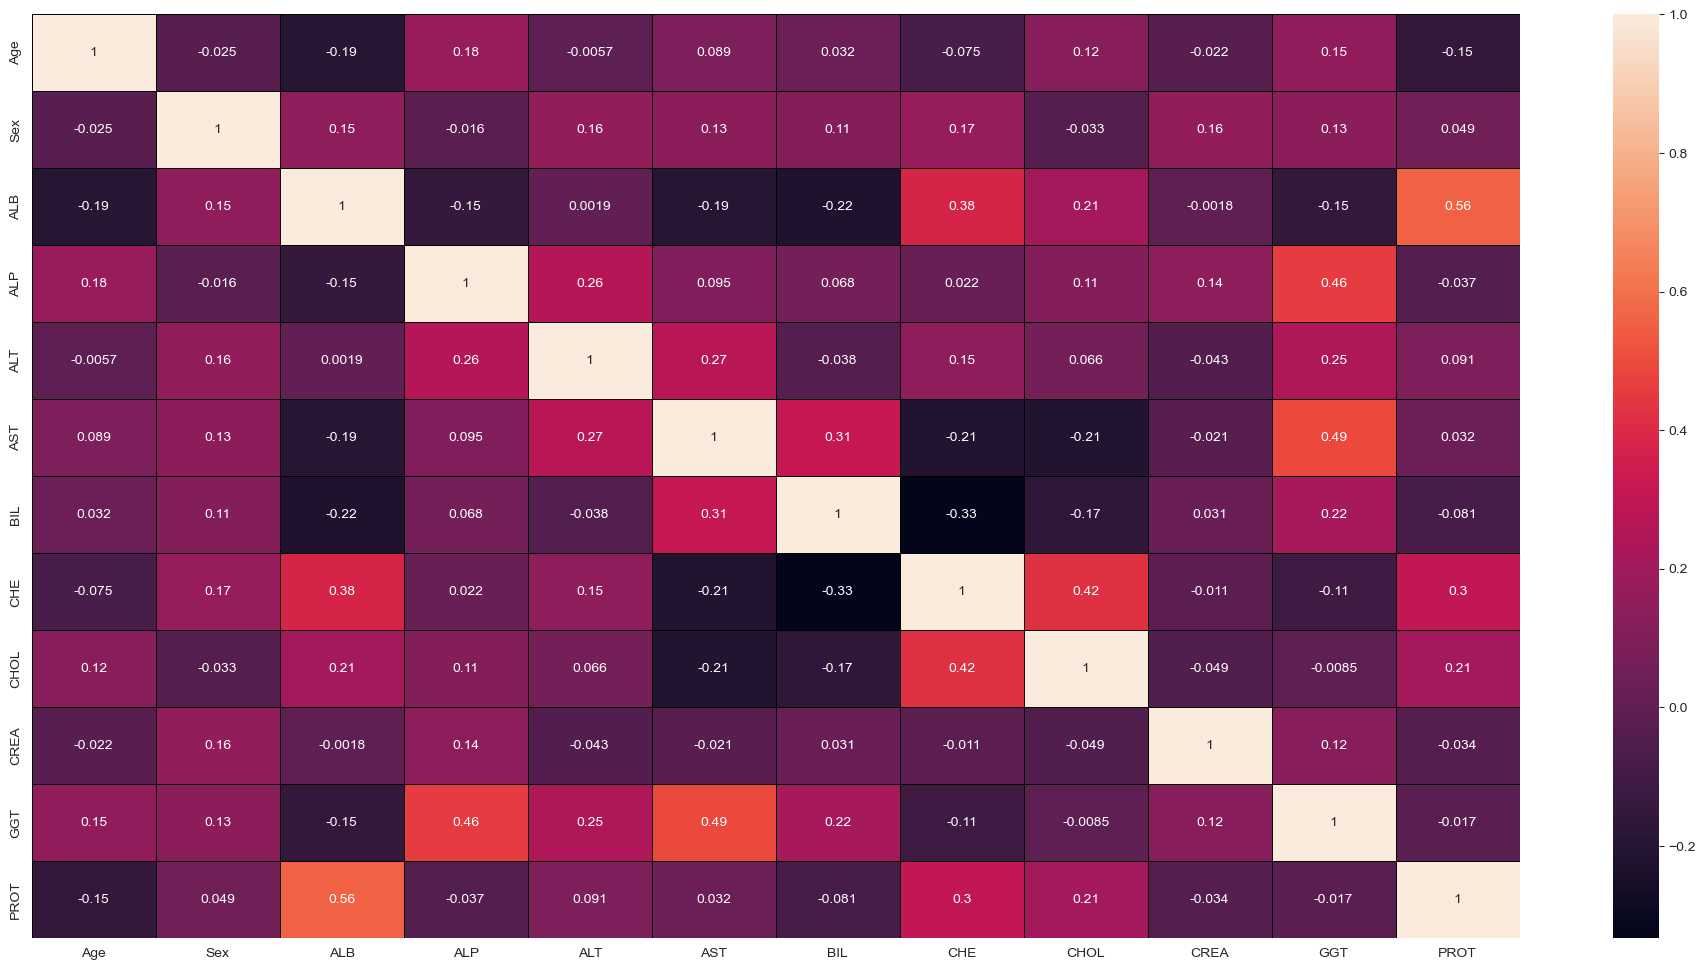

In [22]:
plt.figure(figsize=(24, 12))
sns.heatmap(data.corr(), annot=True, linewidths=0.5, linecolor='black')

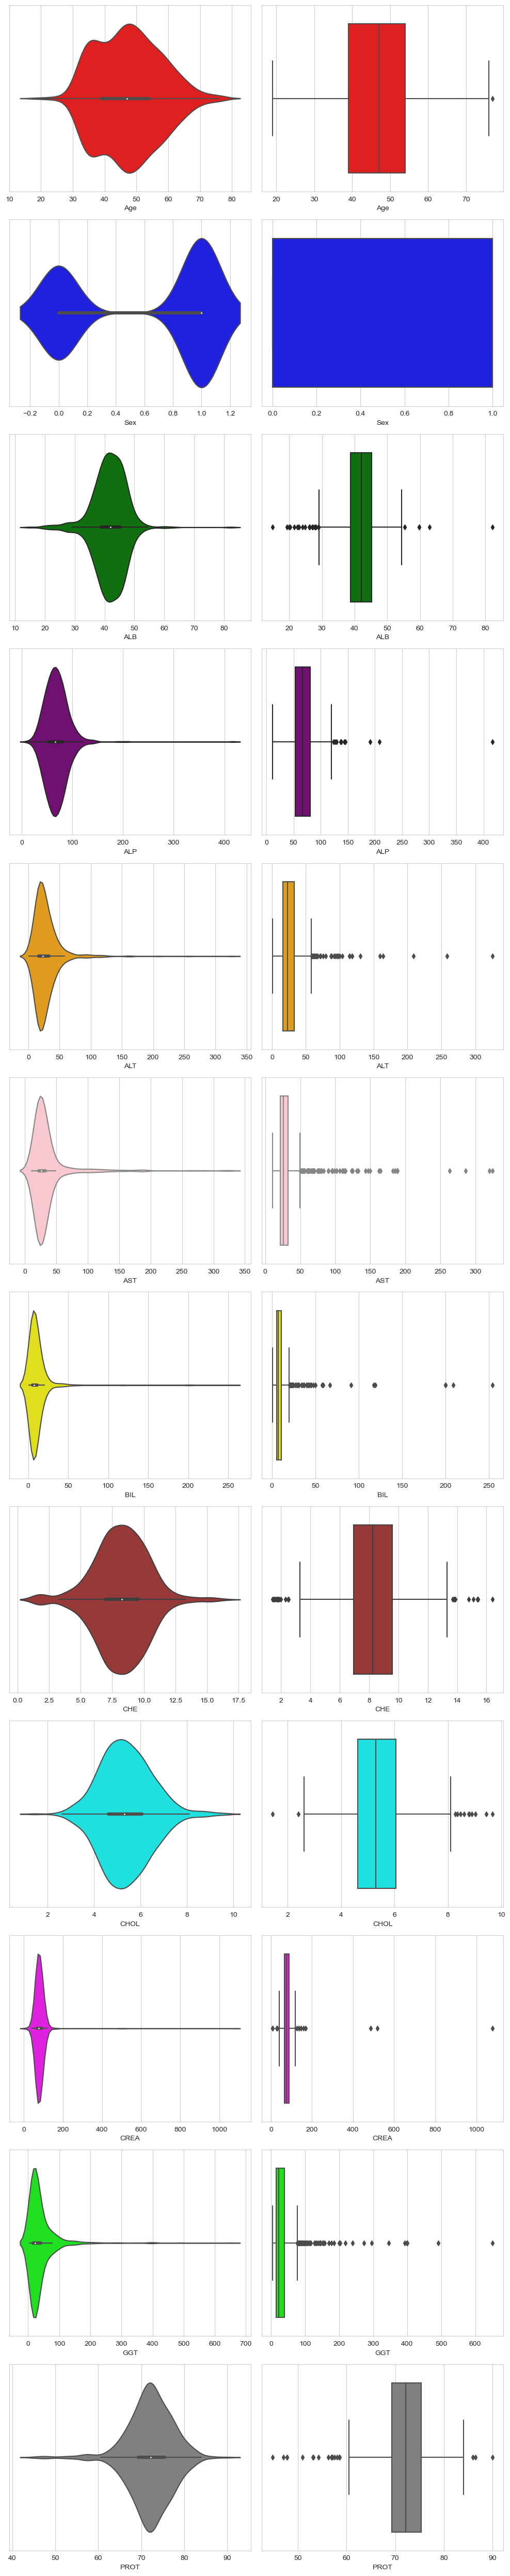

In [23]:
fig, axs = plt.subplots(ncols=2, nrows=len(data.columns), figsize=(10, 50))
colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'yellow', 'brown', 'cyan', 'magenta', 'lime', 'gray']
for i, col in enumerate(data.columns):
    sns.violinplot(data=data, x=col, ax=axs[i, 0], color=colors[i])
    sns.boxplot(data=data, x=col, ax=axs[i, 1], color=colors[i])
plt.tight_layout()
plt.show()

In [24]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,615.0,47.408130,10.055105,19.00,39.000,47.00,54.000,77.00
Sex,615.0,0.613008,0.487458,0.00,0.000,1.00,1.000,1.00
ALB,615.0,41.626770,5.778221,14.90,38.800,42.00,45.250,82.20
ALP,615.0,68.833129,25.976751,11.30,52.950,66.50,81.000,416.60
ALT,615.0,28.441029,25.450097,0.90,16.400,23.00,33.050,325.30
AST,615.0,34.786341,33.090690,10.60,21.600,25.90,32.900,324.00
BIL,615.0,11.396748,19.673150,0.80,5.300,7.30,11.200,254.00
CHE,615.0,8.196634,2.205657,1.42,6.935,8.26,9.590,16.41
CHOL,615.0,5.370115,1.124331,1.43,4.620,5.30,6.055,9.67
CREA,615.0,81.287805,49.756166,8.00,67.000,77.00,88.000,1079.10


**Univariate analysis and visualization**

<Axes: ylabel='Frequency'>

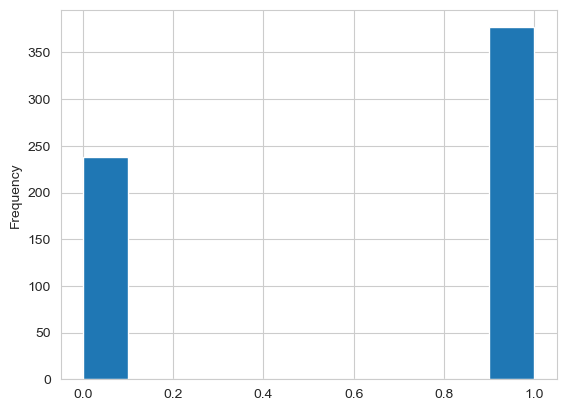

In [25]:
data['Sex'].plot(kind='hist')

<Axes: xlabel='Age', ylabel='Count'>

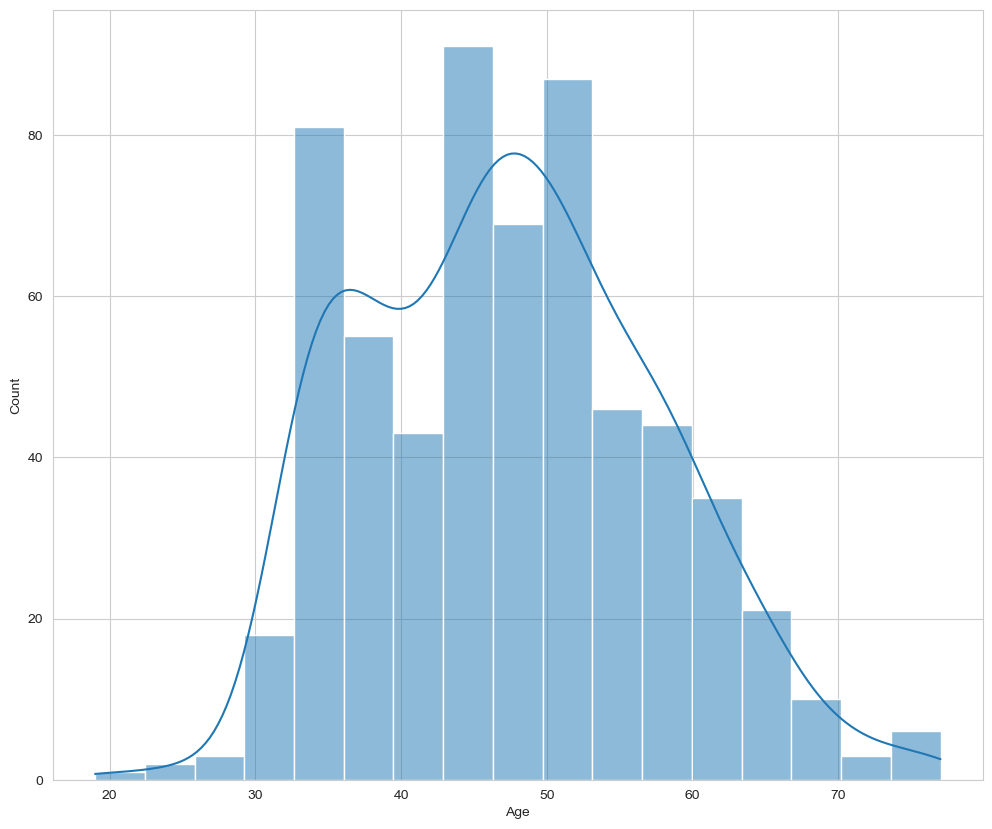

In [26]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='Age', kde=True)

<Axes: xlabel='ALB', ylabel='Count'>

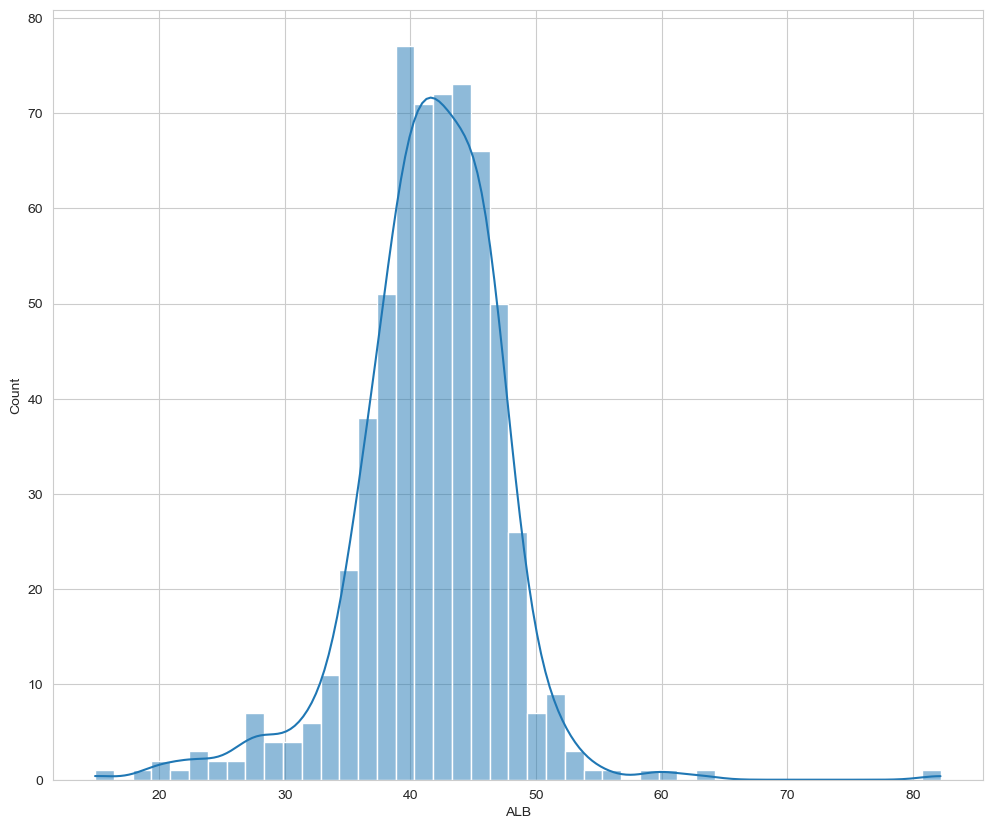

In [27]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='ALB', kde=True)

1. Albumin Tinggi: Kondisi ini jarang terjadi, tetapi dapat menunjukkan dehidrasi atau diet tinggi protein.  
2. Albumin Rendah: Kondisi ini bisa menunjukkan berbagai masalah kesehatan seperti penyakit hati, ginjal, atau kondisi yang menyebabkan protein hilang atau malnutrisi.

<Axes: xlabel='ALP', ylabel='Count'>

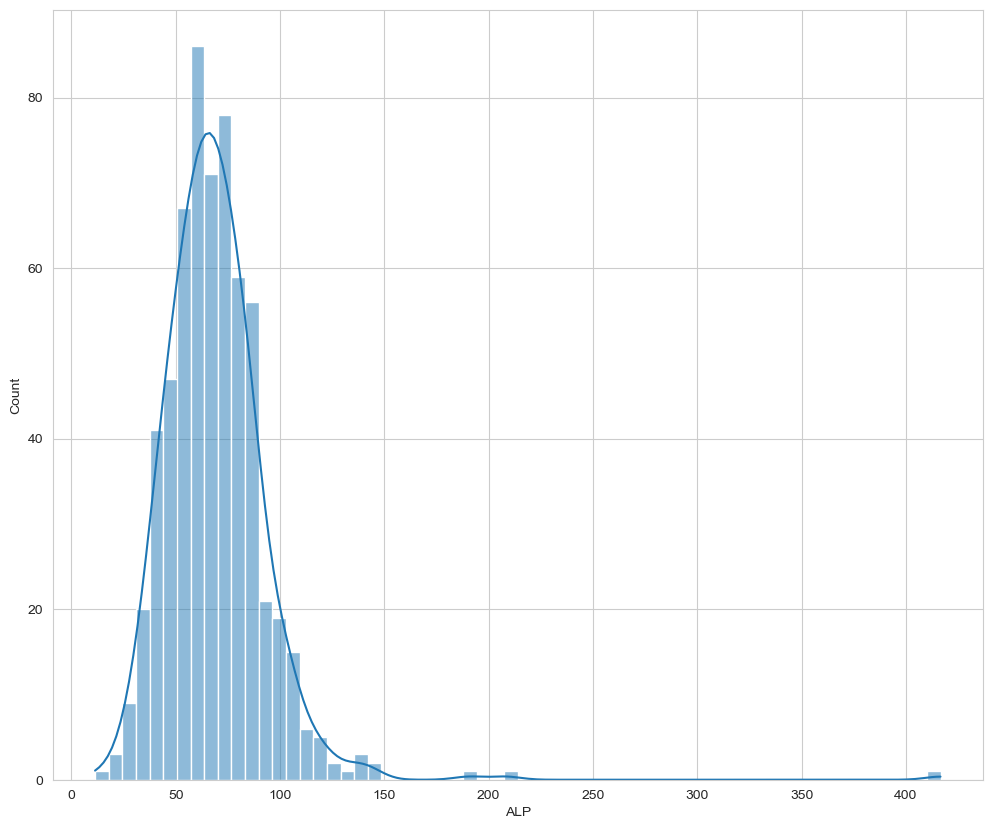

In [28]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='ALP', kde=True)

1. Alkaline Phosphatase rendah tidak menunjukkan masalah yang serius dalam kesehatan.
2. Alkaline Phosphatase tinggi menunjukkan kondisi buruk.

<Axes: xlabel='ALT', ylabel='Count'>

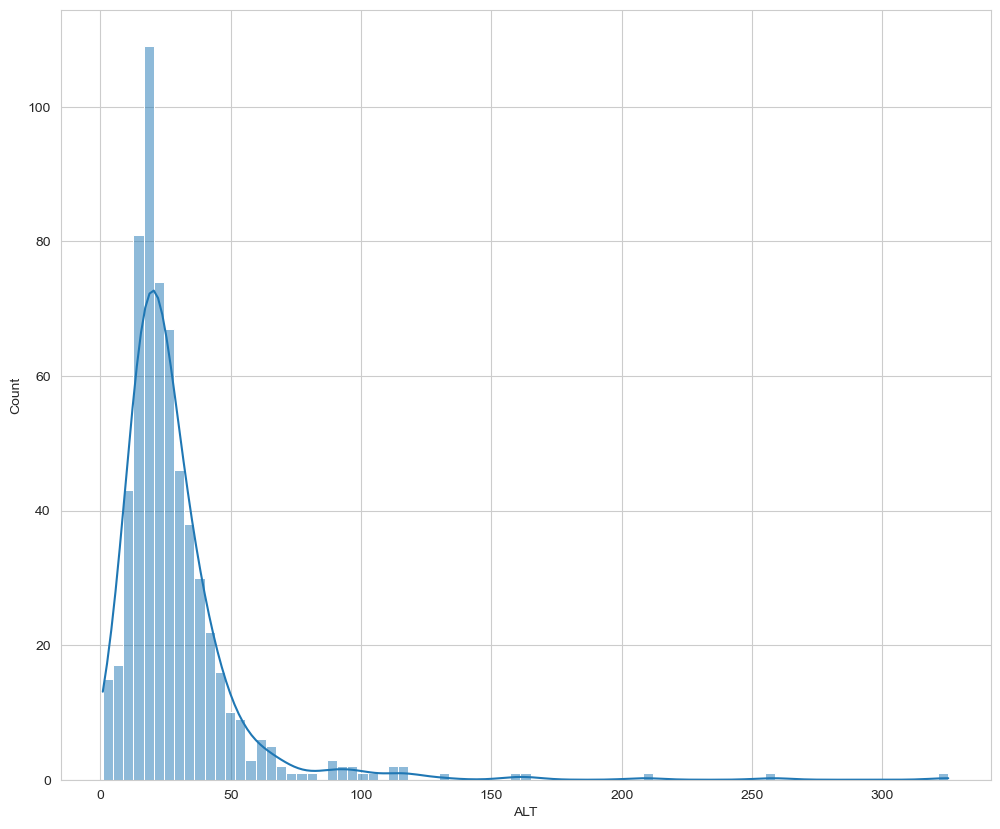

In [29]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='ALT', kde=True)

1. Alanine aminotransferase yang tinggi menunjukkan adanya kerusakan dalam organ hati.
2. Alanine aminotransferase yang rendah menunjukkan tidak adanya masalah yang serius dalam kesehatan.

<Axes: xlabel='AST', ylabel='Count'>

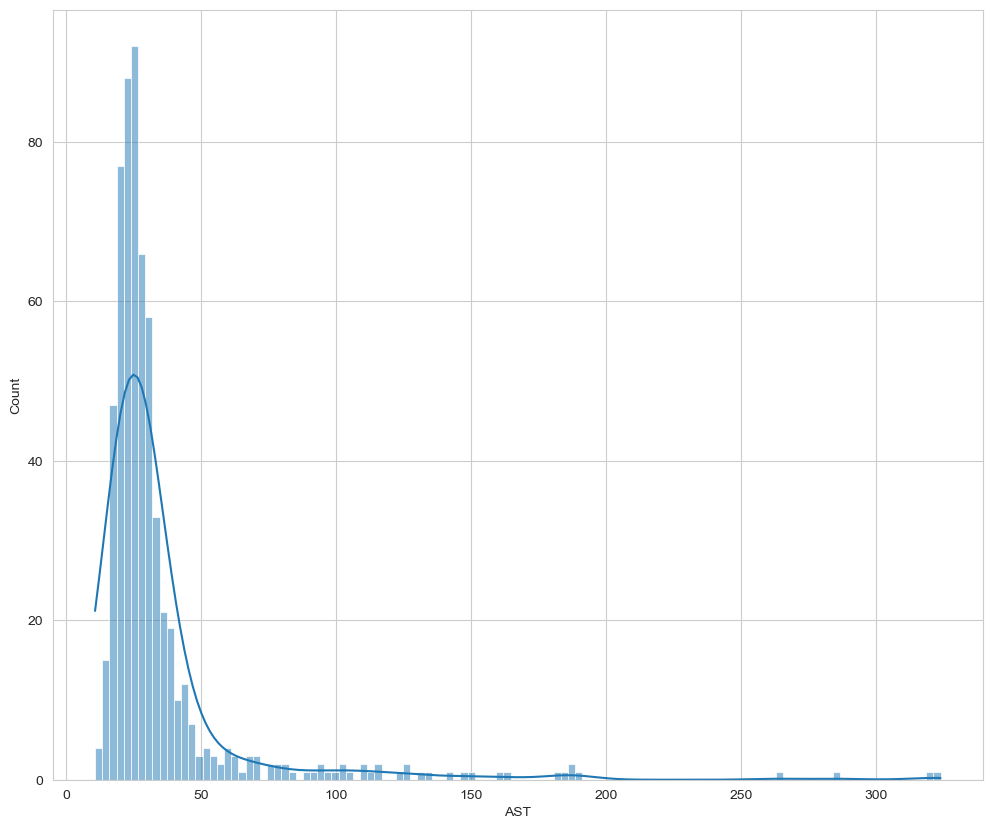

In [30]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='AST', kde=True)

1. Aspartate Aminortransferase yang rendah menunjukkan tidak ada masalah dalam kesehatan, namun jika ast terlalu rendah bisa menunjukan adanya kekurangan vitamin B6
2. Aspartate Aminortransferase yang tinggi menunjukkan adanya pertanda kemungkinan adanya penyakit pada hati.

<Axes: xlabel='BIL', ylabel='Count'>

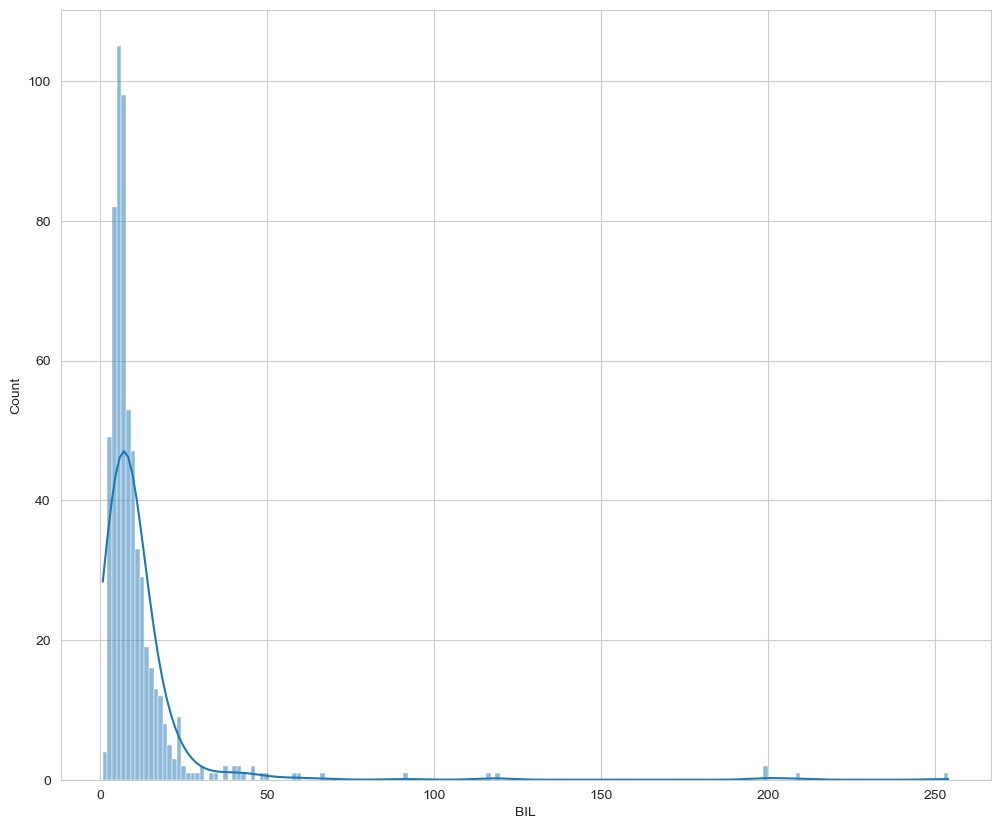

In [31]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='BIL', kde=True)

1. BIL yang tinggi: Dapat menunjukkan adanya masalah dengan hati atau sistem empedu, seperti hepatitis, sirosis, atau obstruksi saluran empedu.
2. BIL yang rendah: Biasanya tidak menunjukkan masalah kesehatan yang serius. Namun, dalam beberapa kasus, tingkat BIL yang sangat rendah dapat dikaitkan dengan paparan tertentu atau penggunaan obat-obatan tertentu. 

<Axes: xlabel='CHE', ylabel='Count'>

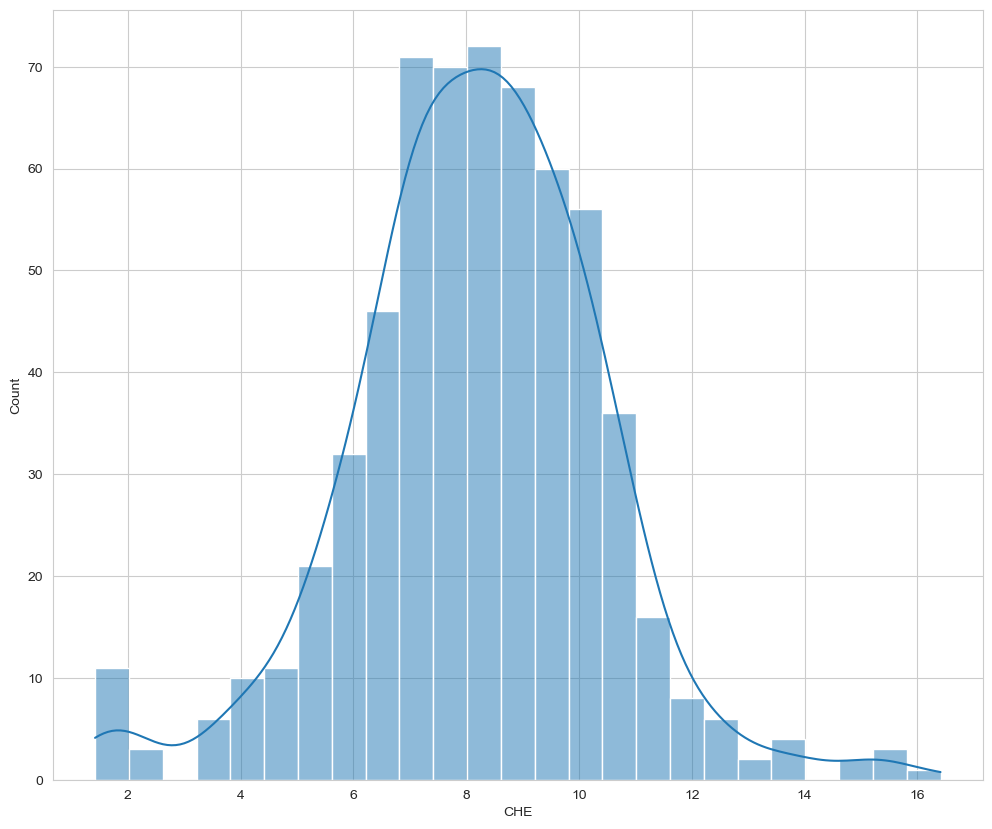

In [32]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='CHE', kde=True)

1. Tingkat CHE yang tinggi: Biasanya tidak menunjukkan masalah kesehatan yang serius. Namun, dalam beberapa kasus, tingkat CHE yang tinggi dapat dikaitkan dengan kondisi seperti penyakit hati, penyakit ginjal, atau obesitas.  
2. Tingkat CHE yang rendah: Dapat menunjukkan adanya keracunan oleh senyawa tertentu, seperti pestisida organofosfat atau gas sarin. Tingkat CHE yang rendah juga bisa terjadi pada kondisi seperti penyakit hati parah, malnutrisi, atau kehamilan.

<Axes: xlabel='CHOL', ylabel='Count'>

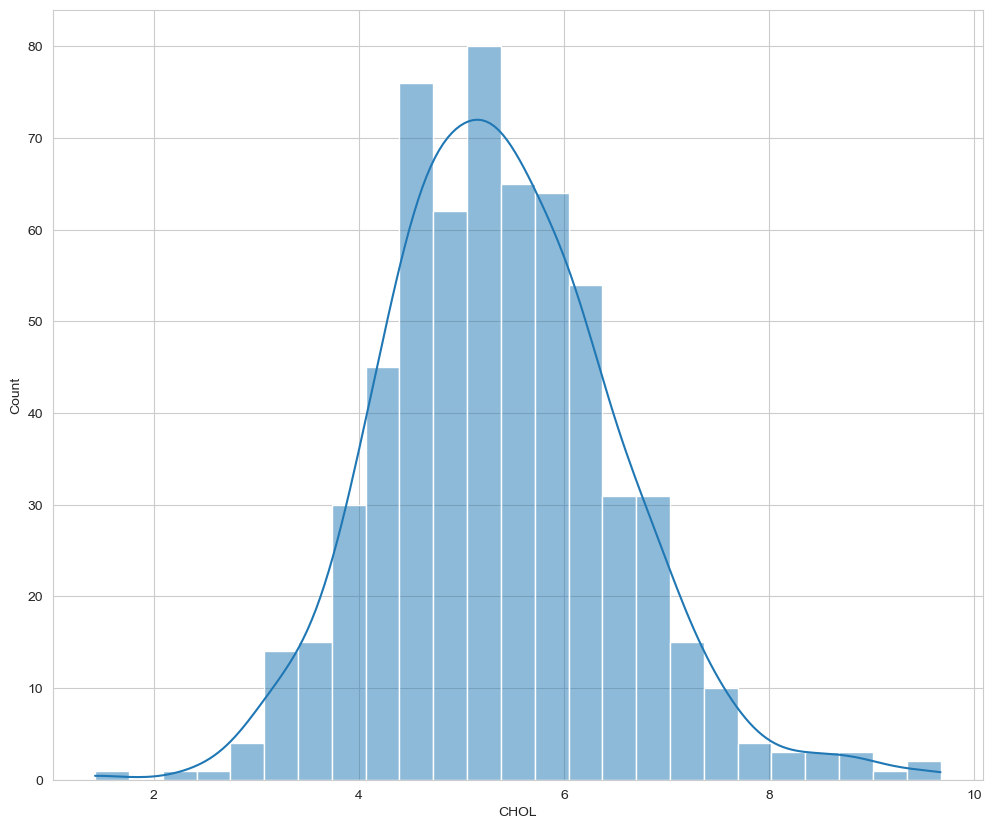

In [33]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='CHOL', kde=True)

1. Tingkat CHOL yang tinggi: Dapat menunjukkan adanya risiko penyakit jantung dan stroke. Tingkat CHOL yang tinggi bisa disebabkan oleh berbagai faktor, termasuk diet tinggi lemak jenuh, merokok, kurang olahraga, obesitas, dan genetika.  
2. Tingkat CHOL yang rendah: Biasanya tidak menunjukkan masalah kesehatan yang serius. Namun, dalam beberapa kasus, tingkat CHOL yang sangat rendah dapat dikaitkan dengan malnutrisi, penyakit hati parah, atau kondisi genetik yang mempengaruhi cara tubuh memetabolisme lemak.

<Axes: xlabel='CREA', ylabel='Count'>

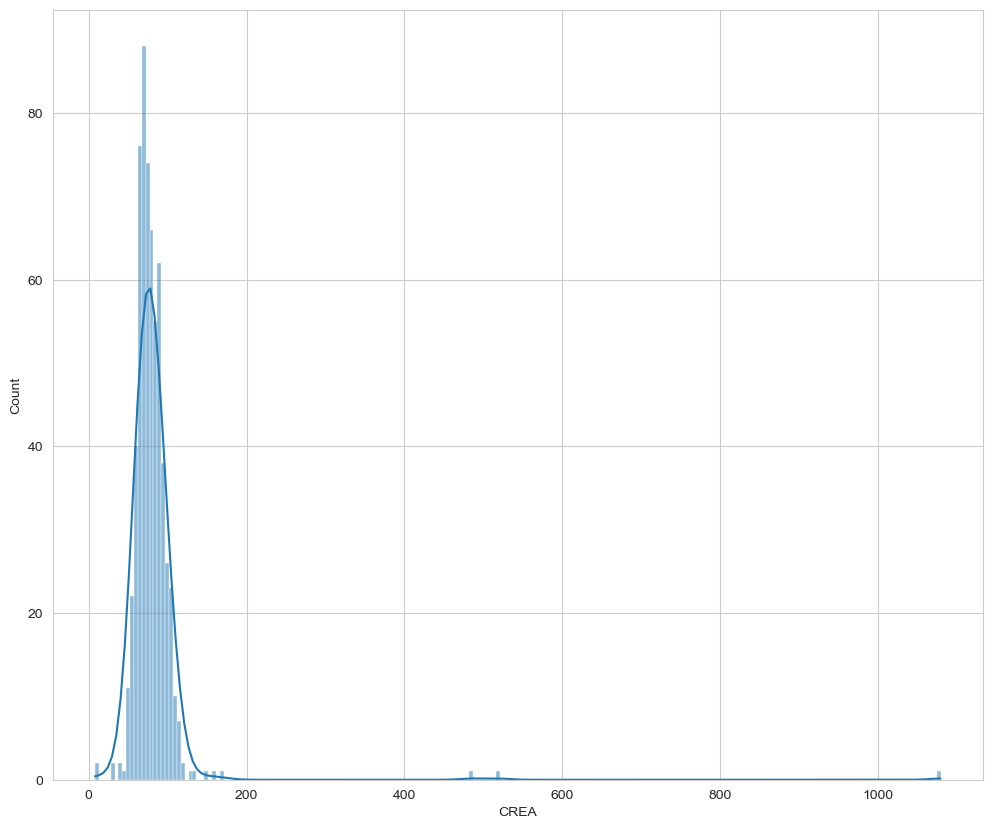

In [34]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='CREA', kde=True)

1. Tingkat CREA yang tinggi: Dapat menunjukkan adanya masalah dengan fungsi ginjal. Tingkat CREA yang tinggi bisa disebabkan oleh berbagai kondisi, termasuk kerusakan ginjal, dehidrasi, atau penyakit yang mempengaruhi otot, seperti rhabdomyolysis atau gigantisme.  
2. Tingkat CREA yang rendah: Biasanya tidak menunjukkan masalah kesehatan yang serius. Namun, dalam beberapa kasus, tingkat CREA yang sangat rendah dapat dikaitkan dengan keadaan seperti kekurangan protein (malnutrisi), penyakit hati, atau kehamilan.

<Axes: xlabel='GGT', ylabel='Count'>

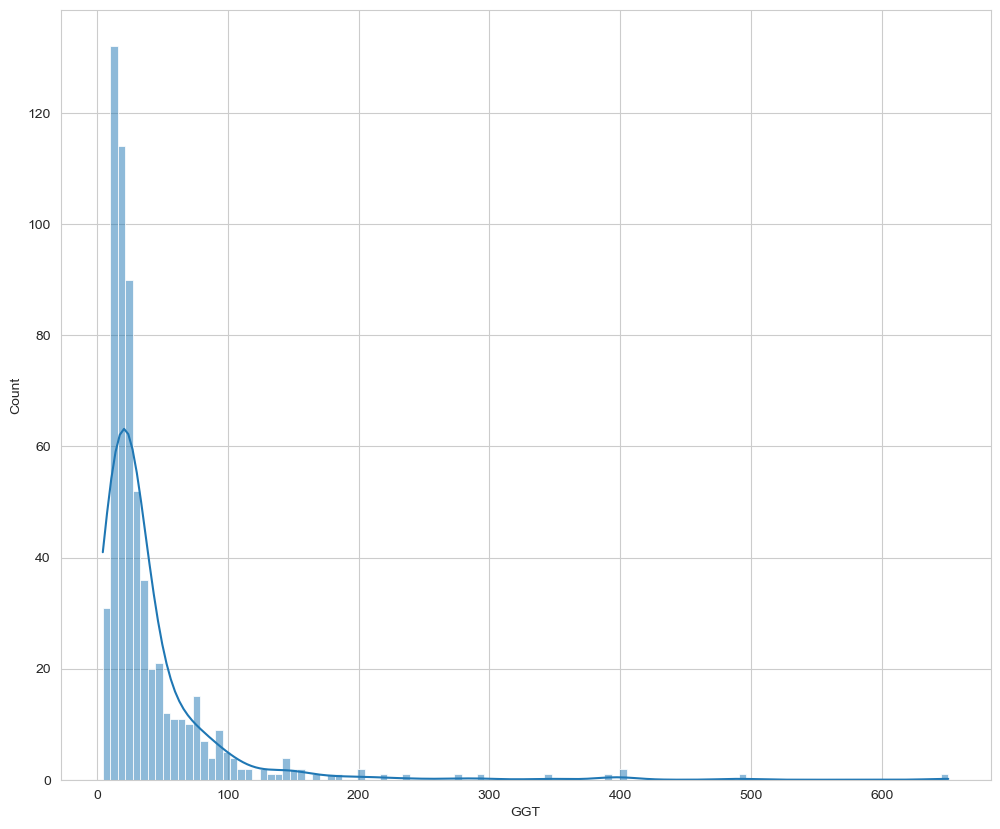

In [35]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='GGT', kde=True)

1. Tingkat Gamma-Glutamyl Transferase yang tinggi: Biasanya menunjukkan adanya masalah dengan hati atau saluran empedu. Tingkat GGT yang tinggi bisa disebabkan oleh berbagai kondisi, termasuk alkoholisme, hepatitis, sirosis, atau obstruksi saluran empedu.  
2. Tingkat Gamma-Glutamyl Transferase yang rendah: Biasanya tidak menunjukkan masalah kesehatan yang serius. Namun, dalam beberapa kasus, tingkat GGT yang sangat rendah dapat dikaitkan dengan konsumsi alkohol yang rendah atau penggunaan obat-obatan tertentu.

<Axes: xlabel='PROT', ylabel='Count'>

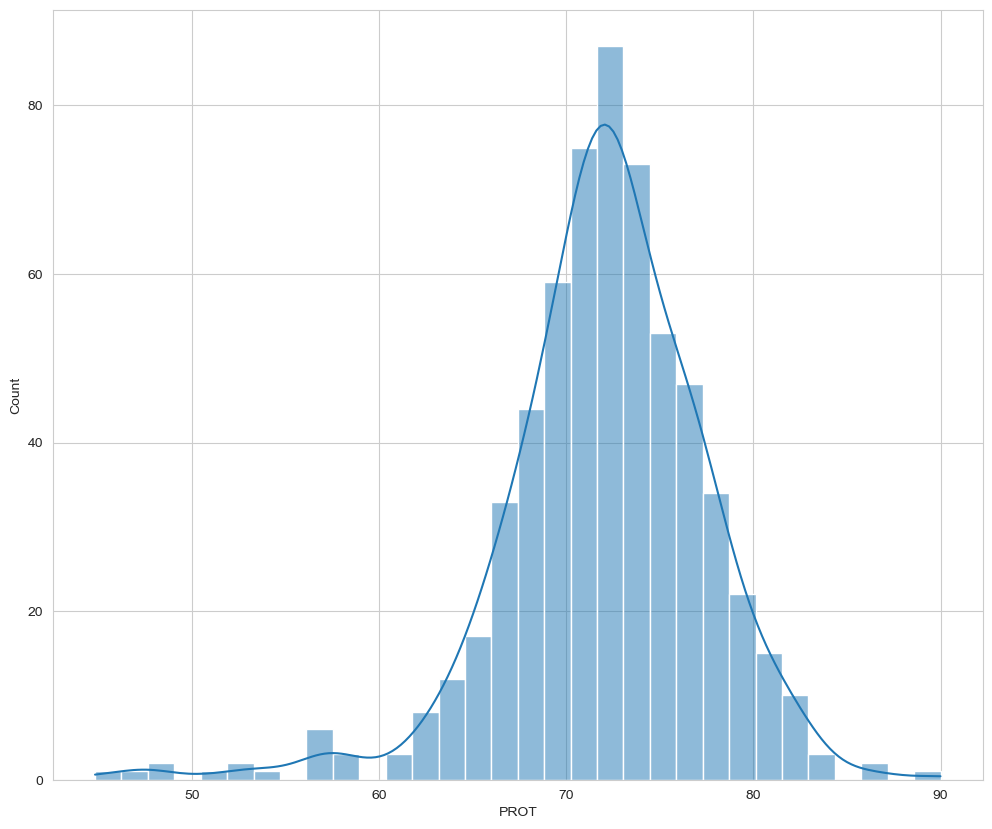

In [36]:
plt.figure(figsize=(12, 10))
sns.histplot(data=data, x='PROT', kde=True)

1. Protein Tinggi: Kondisi ini bisa menunjukkan berbagai kondisi seperti infeksi, inflamasi, penyakit hati, atau kanker darah seperti myeloma multipel.  
2. Protein Rendah: Kondisi ini bisa menunjukkan malnutrisi, penyakit hati, atau penyakit ginjal

In [37]:
data2 = data.join(y)
data2

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
0,32,1,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
1,32,1,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
2,32,1,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
3,32,1,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
4,32,1,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,62,0,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,3=Cirrhosis
611,64,0,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,3=Cirrhosis
612,64,0,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,3=Cirrhosis
613,46,0,33.0,76.287690,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,3=Cirrhosis


In [38]:
#data2.to_csv('new hcv data.csv', index=False)